In [1]:
# Import libraries
import csv
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import warnings
import miscGeneralMethods
import diversity
import statistics
import math
from PIL import Image, ImageEnhance, ImageFont,ImageDraw

In /home/ebb505/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/ebb505/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/ebb505/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/ebb505/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/ebb505/.local/lib/python3.6/site-packages/matplotlib/mpl-data/s

In [2]:
def setConstants():
    global REPLICATES
    global PARENTS_REPOSITORY
    global CHILDREN_REPOSITORY
    global FILE_ORGAN_POS_DESCRIPTOR
    global FILE_TRAIT_DESCRIPTOR
    global FILE_COMPONENTS_MEDIAN
    global FILE_COVERAGE
    global FILE_STATS
    global EVALUATIONS
    global MAXORGANS
    global EXPERIMENTS
    global GENERATIONS
    global POPULATION
    
    PARENTS_REPOSITORY='/home/ebb505/ARE_Project/are-logs/matrix_experiments_2/parents/'
    CHILDREN_REPOSITORY='/home/ebb505/ARE_Project/are-logs/matrix_experiments_2/children/'
    FILE_TRAIT_DESCRIPTOR='MD_Cart_WDH.csv'
    FILE_ORGAN_POS_DESCRIPTOR='organ_pos_desc.csv'
    FILE_COMPONENTS_MEDIAN='componentsMedian.csv'
    REPLICATES = 1
    EVALUATIONS = 20
    MAXORGANS = 16
    GENERATIONS = 1
    POPULATION = 20
    FILE_COVERAGE='coverage.csv'
    FILE_STATS='stats.csv'
    EXPERIMENTS = ['1','5','10','25','50','100']
    print('Repository: ' + PARENTS_REPOSITORY)
    print('Descriptors: ' + FILE_ORGAN_POS_DESCRIPTOR)
    print('Components median: ' + FILE_COMPONENTS_MEDIAN)
    print('Replicates: ' + str(REPLICATES))

In [3]:
setConstants()
font = {'weight' : 'normal',
                    'size'   : 14.0}
plt.rc('font', **font)
parent_folders = []
exp_pos_desc_parents = []
exp_trait_desc_parents = []
exp_pos_desc_children = []
exp_trait_desc_children = []
for exp in EXPERIMENTS:
    print('---',exp,'---')
    if(exp == '1'):
        print(PARENTS_REPOSITORY + exp)
        folders,folderNames = miscGeneralMethods.getDirectories(PARENTS_REPOSITORY + exp)
        parent_folders.append(folders)
        dataDescriptors = miscGeneralMethods.getDataFromFiles(folders, FILE_ORGAN_POS_DESCRIPTOR, 0)
        arrayDescriptors = miscGeneralMethods.transformDataToArray(dataDescriptors, REPLICATES)
        exp_pos_desc_parents.append(arrayDescriptors)
        folders,folderNames = miscGeneralMethods.getDirectories(PARENTS_REPOSITORY + exp)
        dataDescriptors = miscGeneralMethods.getDataFromFiles(folders, FILE_TRAIT_DESCRIPTOR, 0)
        arrayDescriptors = miscGeneralMethods.transformDataToArray(dataDescriptors, REPLICATES)
        exp_trait_desc_parents.append(arrayDescriptors)
    print(CHILDREN_REPOSITORY + exp)
    folders,folderNames = miscGeneralMethods.getDirectories(CHILDREN_REPOSITORY + exp)
    dataDescriptors = miscGeneralMethods.getDataFromFiles(folders, FILE_ORGAN_POS_DESCRIPTOR, 0)
    arrayDescriptors = miscGeneralMethods.transformDataToArray(dataDescriptors, REPLICATES)
    exp_pos_desc_children.append(arrayDescriptors)
    folders,folderNames = miscGeneralMethods.getDirectories(CHILDREN_REPOSITORY + exp)
    dataDescriptors = miscGeneralMethods.getDataFromFiles(folders, FILE_TRAIT_DESCRIPTOR, 0)
    arrayDescriptors = miscGeneralMethods.transformDataToArray(dataDescriptors, REPLICATES)
    exp_trait_desc_children.append(arrayDescriptors)

Repository: /home/ebb505/ARE_Project/are-logs/matrix_experiments_2/parents/
Descriptors: organ_pos_desc.csv
Components median: componentsMedian.csv
Replicates: 1
--- 1 ---
/home/ebb505/ARE_Project/are-logs/matrix_experiments_2/parents/1
Getting directories...
--- Folders:  1
Getting data from files...
Transform data to array...
Getting directories...
--- Folders:  1
Getting data from files...
Transform data to array...
/home/ebb505/ARE_Project/are-logs/matrix_experiments_2/children/1
Getting directories...
--- Folders:  1
Getting data from files...
Transform data to array...
Getting directories...
--- Folders:  1
Getting data from files...
Transform data to array...
--- 5 ---
/home/ebb505/ARE_Project/are-logs/matrix_experiments_2/children/5
Getting directories...
--- Folders:  1
Getting data from files...
Transform data to array...
Getting directories...
--- Folders:  1
Getting data from files...
Transform data to array...
--- 10 ---
/home/ebb505/ARE_Project/are-logs/matrix_experiments

In [46]:
# Count differences
exp_robots_difference = []
for exp in range(len(EXPERIMENTS)):
    list_robots_difference = []
    for parent in range(POPULATION):
        print("Parent: ", parent)
        robot_difference = []
        for child in range(EVALUATIONS):
            counter = 0
            for cell in range(1,len(exp_pos_desc_children[exp][0][child]),1):
                if(exp_pos_desc_parents[0][0][parent][cell] != exp_pos_desc_children[exp][0][child+parent*EVALUATIONS][cell]):
                    counter = counter + 1
            robot_difference.append(counter)
            print("Child: ", child, counter)
        list_robots_difference.append(robot_difference)
    exp_robots_difference.append(list_robots_difference)

Parent:  0
Child:  0 0
Child:  1 0
Child:  2 0
Child:  3 0
Child:  4 0
Child:  5 0
Child:  6 0
Child:  7 0
Child:  8 0
Child:  9 0
Child:  10 0
Child:  11 0
Child:  12 0
Child:  13 0
Child:  14 0
Child:  15 0
Child:  16 0
Child:  17 0
Child:  18 0
Child:  19 0
Parent:  1
Child:  0 8
Child:  1 10
Child:  2 8
Child:  3 8
Child:  4 10
Child:  5 13
Child:  6 7
Child:  7 8
Child:  8 8
Child:  9 8
Child:  10 8
Child:  11 12
Child:  12 12
Child:  13 10
Child:  14 8
Child:  15 10
Child:  16 10
Child:  17 8
Child:  18 8
Child:  19 8
Parent:  2
Child:  0 3
Child:  1 3
Child:  2 3
Child:  3 7
Child:  4 3
Child:  5 3
Child:  6 3
Child:  7 3
Child:  8 3
Child:  9 3
Child:  10 3
Child:  11 3
Child:  12 3
Child:  13 3
Child:  14 3
Child:  15 3
Child:  16 8
Child:  17 3
Child:  18 3
Child:  19 3
Parent:  3
Child:  0 0
Child:  1 0
Child:  2 0
Child:  3 0
Child:  4 0
Child:  5 0
Child:  6 0
Child:  7 0
Child:  8 0
Child:  9 0
Child:  10 0
Child:  11 0
Child:  12 0
Child:  13 0
Child:  14 0
Child:  15 0


Child:  19 0
Parent:  13
Child:  0 9
Child:  1 9
Child:  2 9
Child:  3 9
Child:  4 10
Child:  5 8
Child:  6 7
Child:  7 9
Child:  8 9
Child:  9 8
Child:  10 9
Child:  11 9
Child:  12 9
Child:  13 9
Child:  14 8
Child:  15 8
Child:  16 10
Child:  17 10
Child:  18 8
Child:  19 9
Parent:  14
Child:  0 0
Child:  1 0
Child:  2 0
Child:  3 0
Child:  4 0
Child:  5 0
Child:  6 0
Child:  7 0
Child:  8 0
Child:  9 0
Child:  10 0
Child:  11 0
Child:  12 0
Child:  13 0
Child:  14 0
Child:  15 0
Child:  16 0
Child:  17 0
Child:  18 0
Child:  19 0
Parent:  15
Child:  0 0
Child:  1 0
Child:  2 0
Child:  3 0
Child:  4 0
Child:  5 0
Child:  6 0
Child:  7 0
Child:  8 0
Child:  9 0
Child:  10 0
Child:  11 0
Child:  12 0
Child:  13 0
Child:  14 0
Child:  15 0
Child:  16 0
Child:  17 0
Child:  18 0
Child:  19 0
Parent:  16
Child:  0 10
Child:  1 13
Child:  2 13
Child:  3 14
Child:  4 13
Child:  5 14
Child:  6 12
Child:  7 16
Child:  8 13
Child:  9 13
Child:  10 16
Child:  11 16
Child:  12 13
Child:  13 13


Child:  19 0
Parent:  5
Child:  0 9
Child:  1 9
Child:  2 9
Child:  3 9
Child:  4 9
Child:  5 9
Child:  6 8
Child:  7 9
Child:  8 9
Child:  9 9
Child:  10 8
Child:  11 9
Child:  12 9
Child:  13 9
Child:  14 9
Child:  15 9
Child:  16 9
Child:  17 9
Child:  18 9
Child:  19 9
Parent:  6
Child:  0 11
Child:  1 11
Child:  2 11
Child:  3 11
Child:  4 11
Child:  5 11
Child:  6 11
Child:  7 11
Child:  8 11
Child:  9 11
Child:  10 11
Child:  11 11
Child:  12 11
Child:  13 11
Child:  14 11
Child:  15 11
Child:  16 11
Child:  17 11
Child:  18 11
Child:  19 11
Parent:  7
Child:  0 14
Child:  1 12
Child:  2 12
Child:  3 11
Child:  4 12
Child:  5 11
Child:  6 12
Child:  7 12
Child:  8 13
Child:  9 11
Child:  10 14
Child:  11 11
Child:  12 12
Child:  13 13
Child:  14 13
Child:  15 11
Child:  16 12
Child:  17 11
Child:  18 12
Child:  19 12
Parent:  8
Child:  0 2
Child:  1 2
Child:  2 4
Child:  3 3
Child:  4 1
Child:  5 3
Child:  6 4
Child:  7 2
Child:  8 2
Child:  9 3
Child:  10 2
Child:  11 3
Child: 

Child:  16 0
Child:  17 0
Child:  18 0
Child:  19 0
Parent:  4
Child:  0 0
Child:  1 0
Child:  2 0
Child:  3 0
Child:  4 0
Child:  5 0
Child:  6 0
Child:  7 0
Child:  8 0
Child:  9 0
Child:  10 0
Child:  11 0
Child:  12 0
Child:  13 0
Child:  14 0
Child:  15 0
Child:  16 0
Child:  17 0
Child:  18 0
Child:  19 0
Parent:  5
Child:  0 8
Child:  1 9
Child:  2 9
Child:  3 9
Child:  4 9
Child:  5 8
Child:  6 9
Child:  7 9
Child:  8 9
Child:  9 9
Child:  10 9
Child:  11 9
Child:  12 9
Child:  13 8
Child:  14 9
Child:  15 8
Child:  16 9
Child:  17 8
Child:  18 9
Child:  19 9
Parent:  6
Child:  0 11
Child:  1 11
Child:  2 11
Child:  3 11
Child:  4 11
Child:  5 11
Child:  6 11
Child:  7 9
Child:  8 11
Child:  9 11
Child:  10 11
Child:  11 9
Child:  12 11
Child:  13 11
Child:  14 11
Child:  15 11
Child:  16 11
Child:  17 8
Child:  18 11
Child:  19 9
Parent:  7
Child:  0 12
Child:  1 12
Child:  2 11
Child:  3 13
Child:  4 14
Child:  5 12
Child:  6 12
Child:  7 15
Child:  8 15
Child:  9 11
Child:  

In [47]:
# Mean differences
exp_mean_parents = []
exp_mean_all_children = []
exp_sorted = []
for exp in range(len(EXPERIMENTS)):
    mean_parents = []
    all_changes = []
    for parent in range(POPULATION):
        all_changes = all_changes + exp_robots_difference[exp][parent]
        mean_parents.append([statistics.mean(exp_robots_difference[exp][parent]),parent])
        print("Parent", parent, " mean: ",statistics.mean(exp_robots_difference[exp][parent]))
    exp_mean_parents.append(mean_parents)
    exp_mean_all_children.append(statistics.mean(all_changes))
    print("Mean all children: ", statistics.mean(all_changes))
    sorted_multi_list = sorted(exp_mean_parents[exp], key=lambda x: x[0])
    exp_sorted.append(sorted_multi_list)

Parent 0  mean:  0
Parent 1  mean:  9.1
Parent 2  mean:  3.45
Parent 3  mean:  0
Parent 4  mean:  0
Parent 5  mean:  9
Parent 6  mean:  9.45
Parent 7  mean:  11.15
Parent 8  mean:  2.1
Parent 9  mean:  12.65
Parent 10  mean:  5
Parent 11  mean:  2
Parent 12  mean:  0
Parent 13  mean:  9.05
Parent 14  mean:  0
Parent 15  mean:  0
Parent 16  mean:  13.05
Parent 17  mean:  0
Parent 18  mean:  16
Parent 19  mean:  0
Mean all children:  5.1
Parent 0  mean:  0.3
Parent 1  mean:  10.45
Parent 2  mean:  4.45
Parent 3  mean:  0
Parent 4  mean:  0
Parent 5  mean:  9
Parent 6  mean:  9.85
Parent 7  mean:  11.35
Parent 8  mean:  2.25
Parent 9  mean:  13.2
Parent 10  mean:  5
Parent 11  mean:  2.75
Parent 12  mean:  0
Parent 13  mean:  8.8
Parent 14  mean:  0
Parent 15  mean:  0
Parent 16  mean:  13.9
Parent 17  mean:  0.15
Parent 18  mean:  15.7
Parent 19  mean:  0
Mean all children:  5.3575
Parent 0  mean:  0.35
Parent 1  mean:  12.2
Parent 2  mean:  6.1
Parent 3  mean:  0
Parent 4  mean:  0
Pare

In [48]:
for exp in range(len(EXPERIMENTS)):
    new = Image.new("RGBA", (200,1000))
    images = []
    for parent in range(3,POPULATION,4):
        print(str(sorted_multi_list[parent][1]))
        img = Image.open(parent_folders[0][0]+"/images/robot_0_"+str(exp_sorted[exp][parent][1])+"_3.png")
        img = img.resize((200,200))
        draw = ImageDraw.Draw(img) 
        fnt = ImageFont.truetype("Pillow/Tests/fonts/FreeMono.ttf", 40)
        draw.text((10,10), str(exp_sorted[exp][parent][1]), (0, 0, 0),fnt)
        new.paste(img, (0,800-200*int(parent/4)))
        images.append(img)
    new.show()
    new = new.save(PARENTS_REPOSITORY + EXPERIMENTS[exp] + "sorted_robots_mat.png")

15
17
13
1
9
15
17
13
1
9
15
17
13
1
9
15
17
13
1
9
15
17
13
1
9
15
17
13
1
9


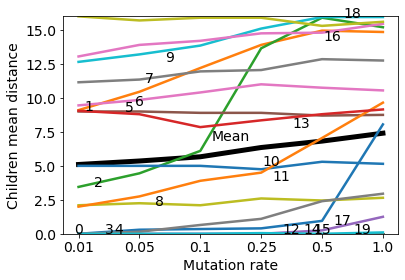

In [49]:
markers = ['o','>','o','>','o','>','o']
colours = [[230/255,25/255,75/255],[245/255,130/255,48/255],[255/255,255/255,25/255],[210/255,245/255,60/255],[60/255,180/255,75/255],[70/255,240/255,240/255],[0/255,130/255,200/255],[145/255,30/255,180/255],[240/255,50/255,230/255],[128/255,128/255,128/255],[0,0,0],[245/255,130/255,48/255],[255/255,255/255,25/255],[210/255,245/255,60/255],[60/255,180/255,75/255],[70/255,240/255,240/255],[0/255,130/255,200/255],[145/255,30/255,180/255],[240/255,50/255,230/255],[128/255,128/255,128/255],[0,0,0]]
# colorIndex = [0,8,9,10]
colorIndex = [0,6,10]
fig = plt.figure(facecolor='white')
# for exp in range(len(EXPERIMENTS)):
plt.plot(exp_mean_all_children,linewidth = 5.0, color='k')
plt.text(2.5,exp_mean_all_children[3]+0.5,"Mean",horizontalalignment='center')
list_parents = []
for parent in range(POPULATION):
    parent_data = []
    for exp in range(len(EXPERIMENTS)):
        parent_data.append(exp_mean_parents[exp][parent][0])
    list_parents.append(parent_data)
    plt.plot(parent_data,linewidth = 2.5)
    if(parent < 10):
        plt.text(parent/6,parent_data[0],str(parent),horizontalalignment='center')
    else:
        plt.text(1.5+parent/6,parent_data[2],str(parent),horizontalalignment='center')
plt.ylabel('Children mean distance')
plt.xlabel('Mutation rate')
plt.ylim([0.0,16])
tick_label = ['0.01','0.05','0.1','0.25','0.5','1.0']
TICKPOS = range(len(tick_label))
plt.xticks(TICKPOS,tick_label)
plt.savefig(PARENTS_REPOSITORY +'/DistanceAll.png',dpi=200, bbox_inches='tight')

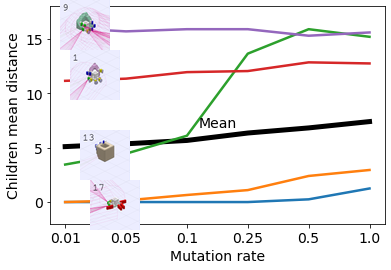

In [50]:
markers = ['o','>','o','>','o','>','o']
colours = [[230/255,25/255,75/255],[245/255,130/255,48/255],[255/255,255/255,25/255],[210/255,245/255,60/255],[60/255,180/255,75/255],[70/255,240/255,240/255],[0/255,130/255,200/255],[145/255,30/255,180/255],[240/255,50/255,230/255],[128/255,128/255,128/255],[0,0,0],[245/255,130/255,48/255],[255/255,255/255,25/255],[210/255,245/255,60/255],[60/255,180/255,75/255],[70/255,240/255,240/255],[0/255,130/255,200/255],[145/255,30/255,180/255],[240/255,50/255,230/255],[128/255,128/255,128/255],[0,0,0]]
# colorIndex = [0,8,9,10]
colorIndex = [0,6,10]
fig = plt.figure(facecolor='white')
# for exp in range(len(EXPERIMENTS)):
plt.plot(exp_mean_all_children,linewidth = 5.0, color='k')
plt.text(2.5,exp_mean_all_children[3]+0.5,"Mean",horizontalalignment='center')
list_parents = []
for parent in range(3,POPULATION,4):
    parent_data = []
    for exp in range(len(EXPERIMENTS)):
        parent_data.append(exp_mean_parents[exp][exp_sorted[2][parent][1]][0])
    list_parents.append(parent_data)
    plt.plot(parent_data,linewidth = 2.5)
plt.ylabel('Children mean distance')
plt.xlabel('Mutation rate')
plt.ylim([-2.0,18])
tick_label = ['0.01','0.05','0.1','0.25','0.5','1.0']
TICKPOS = range(len(tick_label))
plt.xticks(TICKPOS,tick_label)
temp = images[1]
temp.thumbnail((50, 50), Image.ANTIALIAS)
fig.figimage(temp, xo=90, yo=40)
temp = images[2]
temp.thumbnail((50, 50), Image.ANTIALIAS)
fig.figimage(temp, xo=80, yo=90)
temp = images[3]
temp.thumbnail((50, 50), Image.ANTIALIAS)
fig.figimage(temp, xo=70, yo=170)
temp = images[4]
temp.thumbnail((50, 50), Image.ANTIALIAS)
fig.figimage(temp, xo=60, yo=220)
plt.savefig(PARENTS_REPOSITORY +'/DistanceSelected.png',dpi=200, bbox_inches='tight')

In [35]:
# Count differences
exp_robots_difference = []
for exp in range(len(EXPERIMENTS)):
    list_robots_difference = []
    for parent in range(POPULATION):
        print("Parent: ", parent)
        robot_difference = []
        for child in range(EVALUATIONS):
            vector = 0
            for cell in range(1,len(exp_trait_desc_children[exp][0][child]),1):
                diff = exp_trait_desc_parents[0][0][parent][cell] - exp_trait_desc_children[exp][0][child+parent*EVALUATIONS][cell]
                element = pow(diff,2) 
                vector = vector + element
            result = math.sqrt(vector)
            if(result < 0.0001):
                result = 0
            result = round(result,4)
            robot_difference.append(result)
            print("Child: ", child, result)
        list_robots_difference.append(robot_difference)
    exp_robots_difference.append(list_robots_difference)

Parent:  0
Child:  0 0.0001
Child:  1 0.0001
Child:  2 0.0001
Child:  3 0.0001
Child:  4 0.0001
Child:  5 0.0001
Child:  6 0.0001
Child:  7 0.0001
Child:  8 0.0001
Child:  9 0.0001
Child:  10 0.0001
Child:  11 0.0001
Child:  12 0.0002
Child:  13 0.0001
Child:  14 0.0006
Child:  15 0.0001
Child:  16 0.0001
Child:  17 0.0001
Child:  18 0.0001
Child:  19 0.0001
Parent:  1
Child:  0 0.1398
Child:  1 0.0958
Child:  2 0.1398
Child:  3 0.1398
Child:  4 0.1083
Child:  5 0.1023
Child:  6 0.0625
Child:  7 0.1398
Child:  8 0.1398
Child:  9 0.1083
Child:  10 0.1398
Child:  11 0.1086
Child:  12 0.1141
Child:  13 0.1083
Child:  14 0.1398
Child:  15 0.1137
Child:  16 0.0632
Child:  17 0.1398
Child:  18 0.1083
Child:  19 0.1398
Parent:  2
Child:  0 0.0884
Child:  1 0.0884
Child:  2 0.0884
Child:  3 0.1804
Child:  4 0.0884
Child:  5 0.0884
Child:  6 0.0885
Child:  7 0.0884
Child:  8 0.0884
Child:  9 0.0884
Child:  10 0.0884
Child:  11 0.0884
Child:  12 0.0884
Child:  13 0.0884
Child:  14 0.0885
Child: 

Child:  15 0.1277
Child:  16 0.0918
Child:  17 0.2354
Child:  18 0.1569
Child:  19 0.1318
Parent:  19
Child:  0 0.0035
Child:  1 0.0008
Child:  2 0.0004
Child:  3 0.0008
Child:  4 0.0021
Child:  5 0.0008
Child:  6 0.0008
Child:  7 0.0008
Child:  8 0.0009
Child:  9 0.0036
Child:  10 0.0008
Child:  11 0.0008
Child:  12 0.0033
Child:  13 0.0008
Child:  14 0.0026
Child:  15 0
Child:  16 0.0011
Child:  17 0
Child:  18 0
Child:  19 0
Parent:  0
Child:  0 0.3112
Child:  1 0.3998
Child:  2 0.0884
Child:  3 0.2687
Child:  4 0.3543
Child:  5 0.2796
Child:  6 0.2936
Child:  7 0.0007
Child:  8 0.2254
Child:  9 0.1252
Child:  10 0.4138
Child:  11 0.4169
Child:  12 0.3495
Child:  13 0.2323
Child:  14 0.2797
Child:  15 0.4126
Child:  16 0.3816
Child:  17 0.0889
Child:  18 0.341
Child:  19 0.3642
Parent:  1
Child:  0 0.4556
Child:  1 0.5062
Child:  2 0.3995
Child:  3 0.493
Child:  4 0.5381
Child:  5 0.4272
Child:  6 0.459
Child:  7 0.5944
Child:  8 0.4561
Child:  9 0.4621
Child:  10 0.5445
Child:  11 

In [36]:
# Mean differences
exp_mean_parents = []
exp_mean_all_children = []
exp_sorted = []
for exp in range(len(EXPERIMENTS)):
    mean_parents = []
    all_changes = []
    for parent in range(POPULATION):
        all_changes = all_changes + exp_robots_difference[exp][parent]
        mean_parents.append([statistics.mean(exp_robots_difference[exp][parent]),parent])
        print("Parent", parent, " mean: ",statistics.mean(exp_robots_difference[exp][parent]))
    exp_mean_parents.append(mean_parents)
    exp_mean_all_children.append(statistics.mean(all_changes))
    print("Mean all children: ", statistics.mean(all_changes))
    sorted_multi_list = sorted(exp_mean_parents[exp], key=lambda x: x[0])
    exp_sorted.append(sorted_multi_list)

Parent 0  mean:  0.00013000000000000002
Parent 1  mean:  0.11758
Parent 2  mean:  0.093015
Parent 3  mean:  0
Parent 4  mean:  0
Parent 5  mean:  0.6691
Parent 6  mean:  0.334325
Parent 7  mean:  0.06716
Parent 8  mean:  0.042804999999999996
Parent 9  mean:  0.18442
Parent 10  mean:  0.0953
Parent 11  mean:  0.01654
Parent 12  mean:  0
Parent 13  mean:  0.10152
Parent 14  mean:  0.014945
Parent 15  mean:  0.00382
Parent 16  mean:  0.23556
Parent 17  mean:  0.000305
Parent 18  mean:  0.13979
Parent 19  mean:  0.0008
Mean all children:  0.10585575
Parent 0  mean:  0.02833
Parent 1  mean:  0.11299000000000001
Parent 2  mean:  0.101315
Parent 3  mean:  0
Parent 4  mean:  0
Parent 5  mean:  0.66926
Parent 6  mean:  0.36327
Parent 7  mean:  0.090055
Parent 8  mean:  0.091045
Parent 9  mean:  0.19426
Parent 10  mean:  0.09411499999999999
Parent 11  mean:  0.029625
Parent 12  mean:  0
Parent 13  mean:  0.10276
Parent 14  mean:  0.014545
Parent 15  mean:  0.00382
Parent 16  mean:  0.212735
Pare

In [37]:
for parent in range(1,POPULATION,1):
    print(sorted_multi_list[parent][1])

4
12
15
19
17
10
13
7
18
8
14
11
16
0
9
6
1
2
5


In [38]:
for exp in range(len(EXPERIMENTS)):
    new = Image.new("RGBA", (200,1000))
    for parent in range(3,POPULATION,4):
        print(str(sorted_multi_list[parent][1]))
        img = Image.open(parent_folders[0][0]+"/images/robot_0_"+str(exp_sorted[exp][parent][1])+"_3.png")
        img = img.resize((200,200))
        draw = ImageDraw.Draw(img) 
        fnt = ImageFont.truetype("Pillow/Tests/fonts/FreeMono.ttf", 40)
        draw.text((10,10), str(exp_sorted[exp][parent][0]), (0, 0, 0),fnt)
        new.paste(img, (0,800-200*int(parent/4)))
    new.show()
    new = new.save(PARENTS_REPOSITORY + EXPERIMENTS[exp] + "sorted_robots_trait.png")

15
13
14
9
5
15
13
14
9
5
15
13
14
9
5
15
13
14
9
5
15
13
14
9
5
15
13
14
9
5


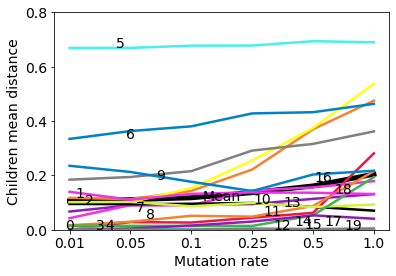

In [43]:
markers = ['o','>','o','>','o','>','o']
colours = [[230/255,25/255,75/255],[245/255,130/255,48/255],[255/255,255/255,25/255],[210/255,245/255,60/255],[60/255,180/255,75/255],[70/255,240/255,240/255],[0/255,130/255,200/255],[145/255,30/255,180/255],[240/255,50/255,230/255],[128/255,128/255,128/255],[0,0,0],[245/255,130/255,48/255],[255/255,255/255,25/255],[210/255,245/255,60/255],[60/255,180/255,75/255],[70/255,240/255,240/255],[0/255,130/255,200/255],[145/255,30/255,180/255],[240/255,50/255,230/255],[128/255,128/255,128/255],[0,0,0]]
# colorIndex = [0,8,9,10]
colorIndex = [0,6,10]
fig = plt.figure(facecolor='white')
# for exp in range(len(EXPERIMENTS)):
plt.plot(exp_mean_all_children,linewidth = 5.0, color='k')
plt.text(2.5,exp_mean_all_children[0],"Mean",horizontalalignment='center')
list_parents = []
for parent in range(POPULATION):
    parent_data = []
    for exp in range(len(EXPERIMENTS)):
        parent_data.append(exp_mean_parents[exp][parent][0])
    list_parents.append(parent_data)
    plt.plot(parent_data,linewidth = 2.5,color=colours[parent])
    if(parent < 10):
        plt.text(parent/6,parent_data[0],str(parent),horizontalalignment='center')
    else:
        plt.text(1.5+parent/6,parent_data[2],str(parent),horizontalalignment='center')
plt.ylabel('Children mean distance')
plt.xlabel('Mutation rate')
plt.ylim([0.0,0.8])
tick_label = ['0.01','0.05','0.1','0.25','0.5','1.0']
TICKPOS = range(len(tick_label))
plt.xticks(TICKPOS,tick_label)
plt.savefig(PARENTS_REPOSITORY +'/DistanceTrait.png',dpi=200, bbox_inches='tight')